In [1]:
import matplotlib 
matplotlib.use('Agg') 
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def plot_logs(history):
    evaluation_cost = history.history['val_loss']
    evaluation_accuracy = history.history['val_acc']
    training_cost = history.history['loss']
    training_accuracy = history.history['acc']
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figwidth(10)
    ax1.plot(evaluation_cost,label= 'test')
    ax1.plot(training_cost, label='train')
    ax1.set_title('Cost')
    ax1.legend()
    ax2.plot(evaluation_accuracy, label='test')
    ax2.plot(training_accuracy, label='train')
    ax2.set_title('Accuracy')
    ax2.legend(loc='lower right')

In [3]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


batch_size = 10
nb_classes = 10
nb_epoch = 30

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)[:50000,:]
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print X_train.shape[0], 'train samples'
print X_test.shape[0], 'test samples'

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train[:50000], nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()
model.add(Dense(30, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=1.0),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)

print 'Test score:', score[0]
print 'Test accuracy:', score[1]

Using TensorFlow backend.


50000 train samples
10000 test samples
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 30)            23550       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 30)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            310         activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 23,860
Trainable params: 23,860
Non-tr

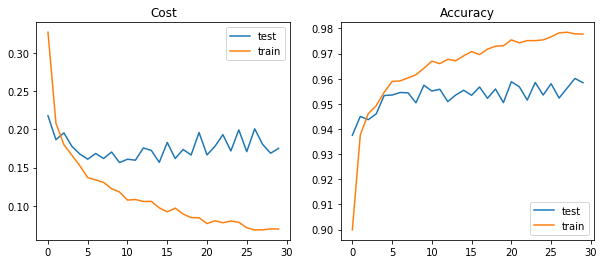

In [4]:
plot_logs(history)

In [5]:
## now with convolution layers

In [10]:
import numpy as np
from keras.datasets import mnist

from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

np.random.seed(1337)  # for reproducibility
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
7s - loss: 1.6978 - acc: 0.4690 - val_loss: 0.4482 - val_acc: 0.8806
Epoch 2/12
5s - loss: 0.6228 - acc: 0.8137 - val_loss: 0.2943 - val_acc: 0.9087
Epoch 3/12
5s - loss: 0.4694 - acc: 0.8592 - val_loss: 0.2228 - val_acc: 0.9349
Epoch 4/12
5s - loss: 0.4022 - acc: 0.8811 - val_loss: 0.1927 - val_acc: 0.9435
Epoch 5/12
5s - loss: 0.3639 - acc: 0.8925 - val_loss: 0.1732 - val_acc: 0.9489
Epoch 6/12
6s - loss: 0.3323 - acc: 0.9025 - val_loss: 0.1571 - val_acc: 0.9546
Epoch 7/12
5s - loss: 0.3107 - acc: 0.9081 - val_loss: 0.1511 - val_acc: 0.9537
Epoch 8/12
5s - loss: 0.2894 - acc: 0.9143 - val_loss: 0.1405 - val_acc: 0.9572
Epoch 9/12
5s - loss: 0.2719 - acc: 0.9193 - val_loss: 0.1367 - val_acc: 0.9577
Epoch 10/12
5s - loss: 0.2580 - acc: 0.9236 - val_loss: 0.1256 - val_acc: 0.9599
Epoch 11/12
5s - loss: 0.2449 - acc: 0.9285 - val_loss: 0.114

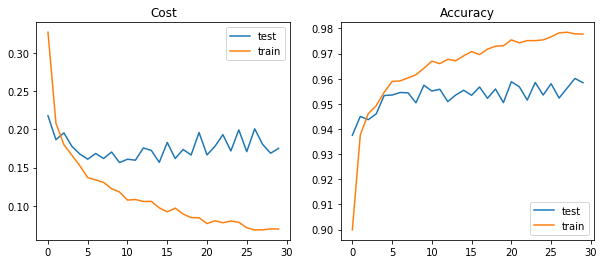

In [11]:
plot_logs(history)